# Figure 10
INP concentrations associated with flight c280

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
INP_concs = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_concentrations.csv', index_col = 'temp_bin')
INP_concs = INP_concs[[col for col in INP_concs.columns if 'c280' in col]]

In [3]:
mosaic = """
a
b
"""

In [4]:
for run in ('r1', 'r2', 'r4'):
    INP_concs[run+'_r3_ratio'] = INP_concs['c280' + run + 't_NT'] / INP_concs['c280r3t_NT']
    frac_err = INP_concs['c280' + run + 't_err'] / INP_concs['c280' + run + 't_NT']
    r3_frac_err = INP_concs['c280r3t_err'] / INP_concs['c280r3t_NT']
    INP_concs[run+'_r3_ratio_err'] = INP_concs[run+'_r3_ratio'] * np.sqrt(frac_err**2 + r3_frac_err**2)

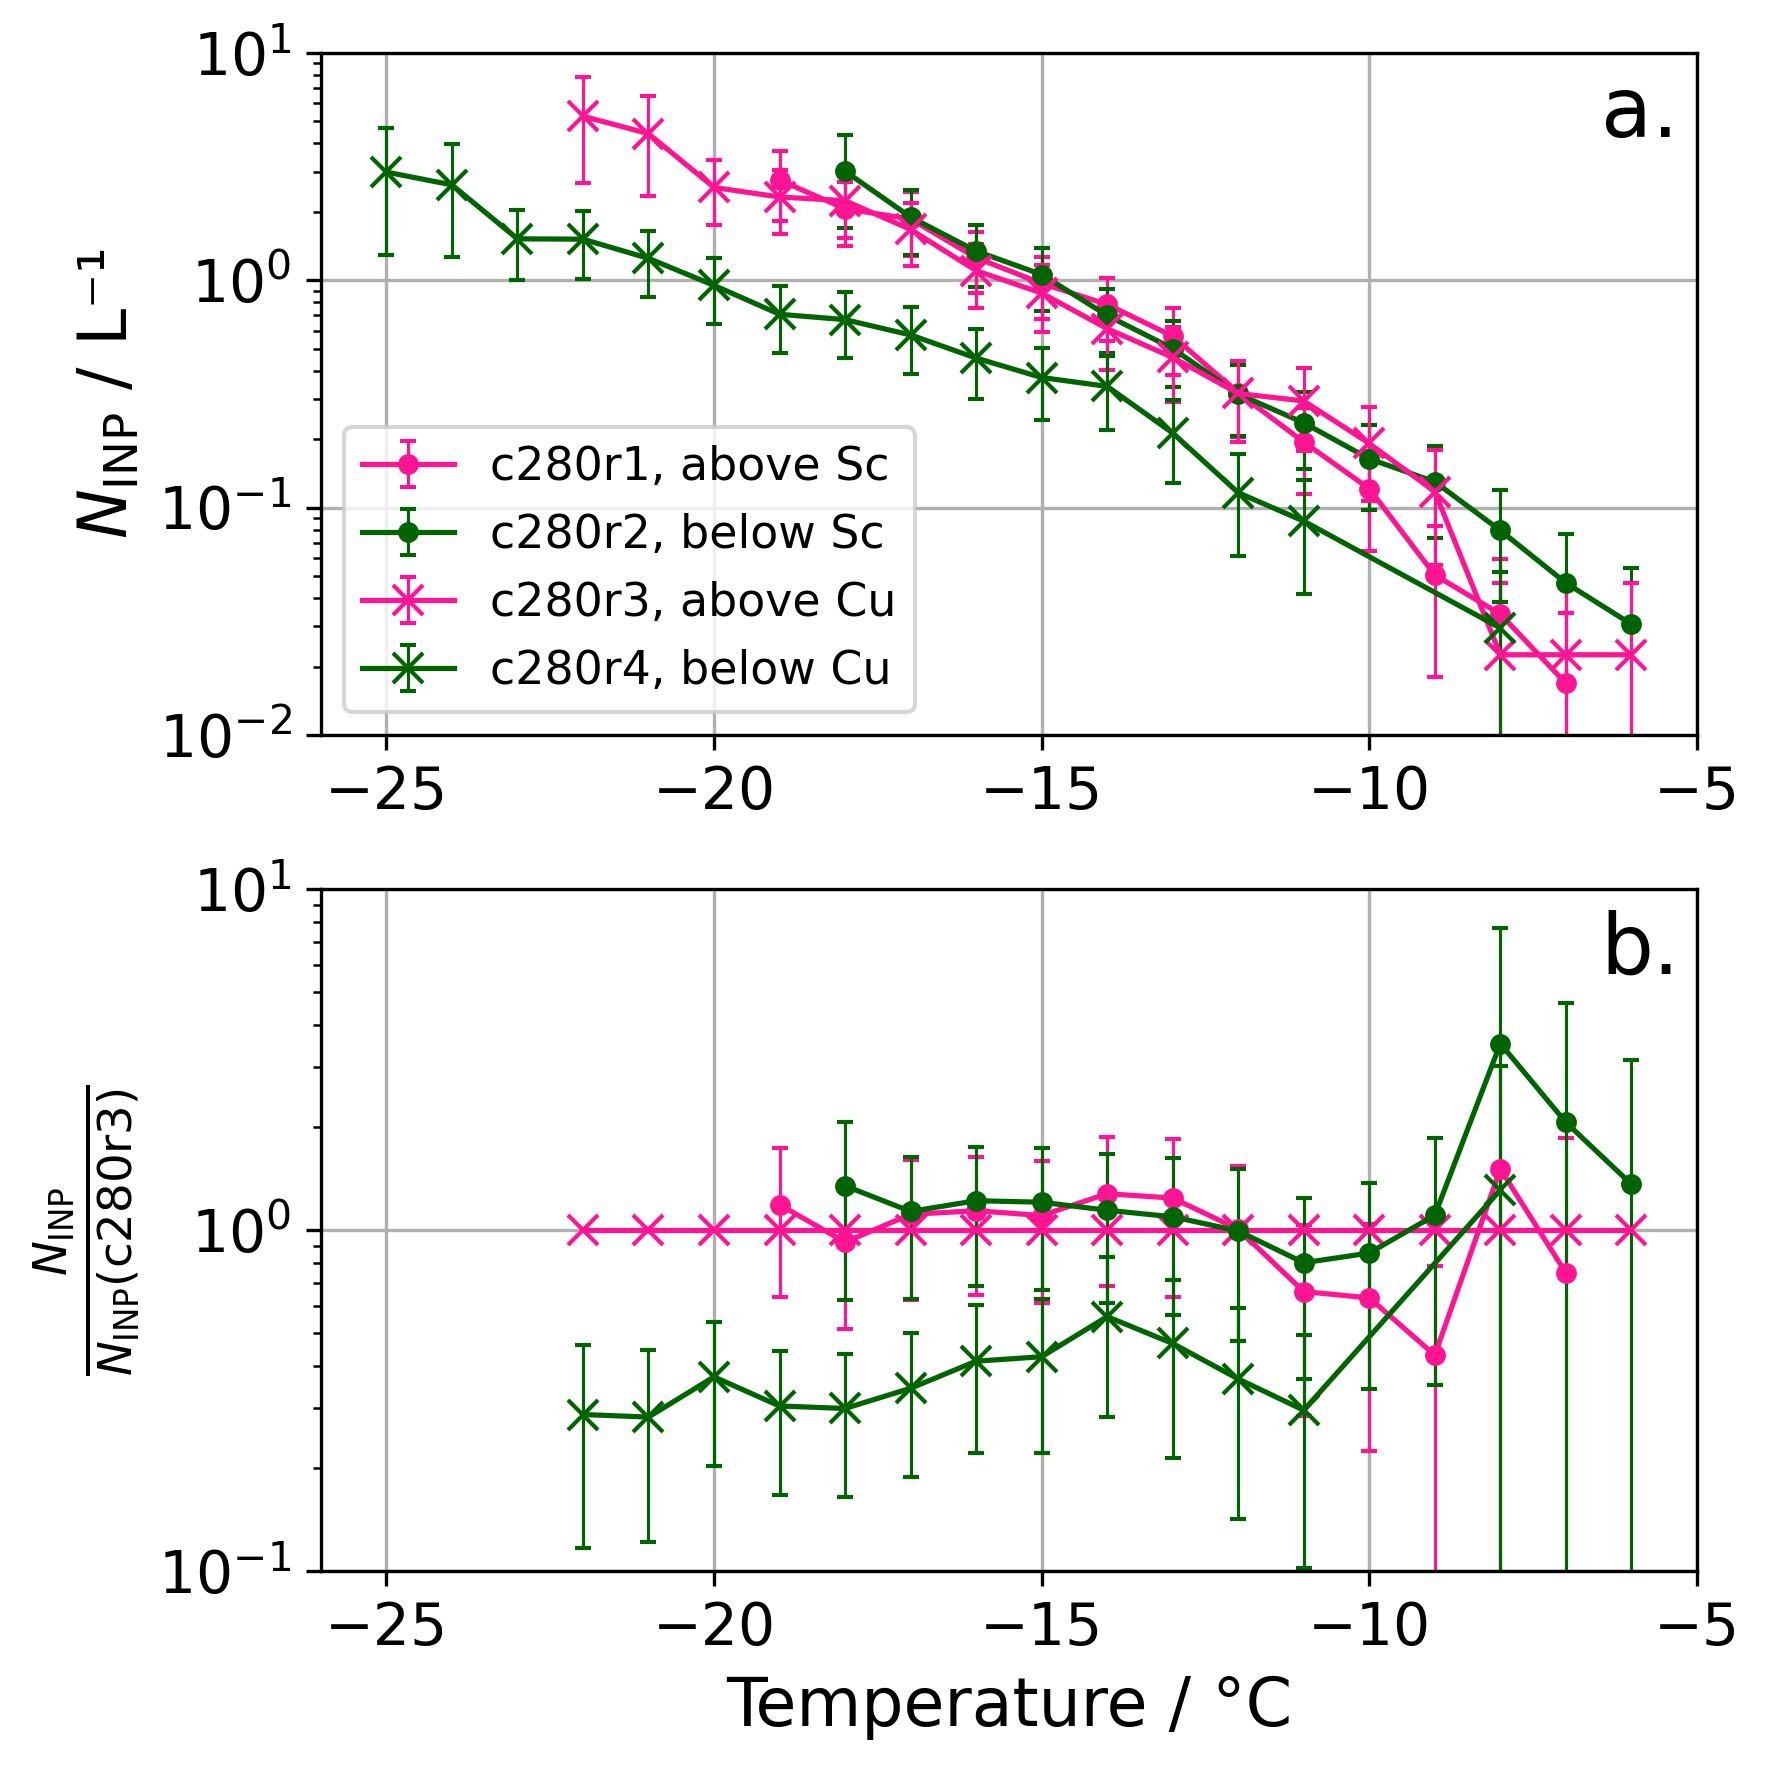

In [6]:
fig, axes = plt.subplot_mosaic(mosaic, figsize=(6,6), dpi=300)

axes['b'].set_xlabel('Temperature / °C', fontsize=16)
axes['a'].set_ylim(0.01,10)
axes['b'].set_ylim(0.1,10)
axes['a'].set_ylabel(r'$N_\mathrm{INP}$ / L⁻¹', fontsize=16)
axes['b'].set_ylabel(r'$\frac{N_\mathrm{INP}}{N_\mathrm{INP}\left(\mathrm{c280r3}\right)}$', fontsize=16)

for ax in axes:
    axes[ax].set_yscale('log')
    axes[ax].set_xlim(-26,-5)
    axes[ax].set_xticks([-25, -20, -15, -10, -5]) 
    axes[ax].grid()
    axes[ax].tick_params(axis='x', labelsize=14) 
    axes[ax].tick_params(axis='y', labelsize=14)
for col in [col for col in INP_concs.columns if col.endswith('NT')]:
    y = INP_concs[col]
    y_err = INP_concs[col[:-2] + 'err']
    run = col[4:6]
    if run in ['r1', 'r3']:
        # Above cloud
        c = 'deeppink'
    else:
        c = 'darkgreen'
    if run in ['r1', 'r2']:
        # Upstream
        m = 'o'
        ms = 4
    else:
        m = 'x'
        ms = 7
    ls = '-'
    labels = {
        'r1': 'c280r1, above Sc',
        'r2': 'c280r2, below Sc',
        'r3': 'c280r3, above Cu',
        'r4': 'c280r4, below Cu'
    }
        
    axes['a'].errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker=m,
        linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
        linewidth=1.25, color=c, label=labels[run])

for col in [col for col in INP_concs.columns if col.endswith('ratio')]:
    y = INP_concs[col]
    y_err = INP_concs[col + '_err']
    if (col.startswith('r1')) or (col.startswith('r3')):
        # Above cloud
        c = 'deeppink'
    else:
        c = 'darkgreen'
    if (col.startswith('r1')) or (col.startswith('r2')):
        # Upstream
        m = 'o'
        ms = 4
    else:
        m = 'x'
        ms = 7
    ls = '-'
        
    axes['b'].errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker=m,
        linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
        linewidth=1.25, color=c)

T = np.arange(-22, -5)
r3 = np.ones(17)
axes['a'].legend(loc="lower left", fontsize=11)
axes['b'].plot(T, r3, marker='x', linestyle='-', markersize=7,
                linewidth=1.25, color='deeppink')

axes['a'].text(0.93, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=axes['a'].transAxes)
axes['b'].text(0.93, 0.97, 'b.', ha='left', va='top', fontsize=20,
           transform=axes['b'].transAxes)
fig.tight_layout()
fig.savefig('./imgs/f10.pdf')